In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# import neattext.functions as nfx

In [2]:
!pip install neattext

     |████████████████████████████████| 112 kB 15.0 MB/s 
You should consider upgrading via the '/opt/python/envs/default/bin/python -m pip install --upgrade pip' command.


In [3]:
data=pd.read_csv("data_train.csv")

In [4]:
data.head()

,Emotion,Text
0,neutral,There are tons of other paintings that I thin...
1,sadness,"Yet the dog had grown old and less capable , a..."
2,fear,When I get into the tube or the train without ...
3,fear,This last may be a source of considerable disq...
4,anger,She disliked the intimacy he showed towards so...


In [5]:
data.shape

(7934, 2)

In [6]:
data.isnull().sum()

Emotion    0
Text       0
dtype: int64

In [7]:
data['Emotion'].value_counts()

sadness    1641
joy        1619
neutral    1616
anger      1566
fear       1492
Name: Emotion, dtype: int64

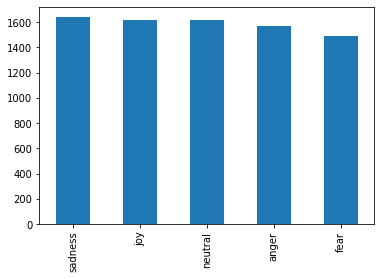

In [8]:
data['Emotion'].value_counts().plot(kind='bar')

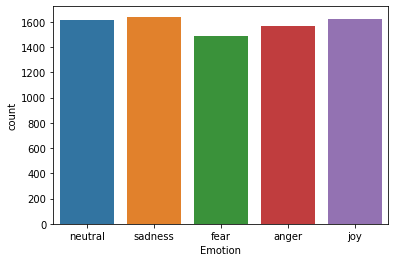

In [9]:
sns.countplot(x='Emotion',data=data)

- #sentiment analysis
  - keyword extrction
  - key words for each emotion
  - wordcloud

In [10]:
!pip install textblob

     |████████████████████████████████| 636 kB 11.7 MB/s 
     |████████████████████████████████| 1.5 MB 38.1 MB/s 
You should consider upgrading via the '/opt/python/envs/default/bin/python -m pip install --upgrade pip' command.


In [11]:
!pip install --upgrade pip

     |████████████████████████████████| 1.5 MB 16.6 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.0.1
    Uninstalling pip-21.0.1:
      Successfully uninstalled pip-21.0.1


In [12]:
from textblob import TextBlob

In [13]:
def get_sentiment(text):
    blob=TextBlob(text)
    sentiment=blob.sentiment.polarity
    if sentiment > 1:
        result="postive"
    elif sentiment< 0:
        result="negetive"
    else:
        result="neutral"
    
    return result

In [14]:
get_sentiment("some words are good and some are super bad")

'neutral'

In [15]:
data['sentiment']=data['Emotion'].apply(get_sentiment)

In [16]:
data.head()

,Emotion,Text,sentiment
0,neutral,There are tons of other paintings that I thin...,neutral
1,sadness,"Yet the dog had grown old and less capable , a...",neutral
2,fear,When I get into the tube or the train without ...,neutral
3,fear,This last may be a source of considerable disq...,neutral
4,anger,She disliked the intimacy he showed towards so...,negetive


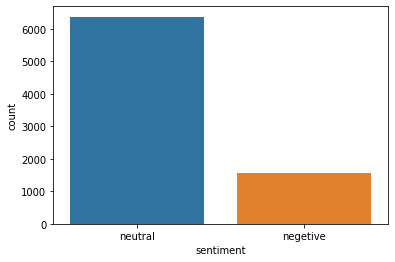

In [17]:
sns.countplot(x='sentiment',data=data)

In [18]:
data.groupby(['Emotion','sentiment']).size()

Emotion  sentiment
anger    negetive     1566
fear     neutral      1492
joy      neutral      1619
neutral  neutral      1616
sadness  neutral      1641
dtype: int64

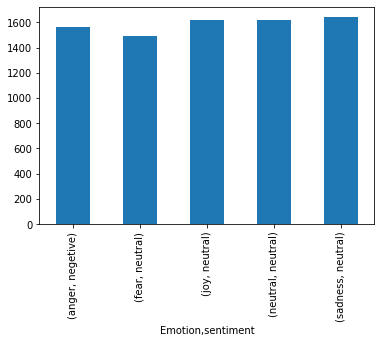

In [19]:
data.groupby(['Emotion','sentiment']).size().plot(kind='bar')

sns.factorplot
sns.ccatplot

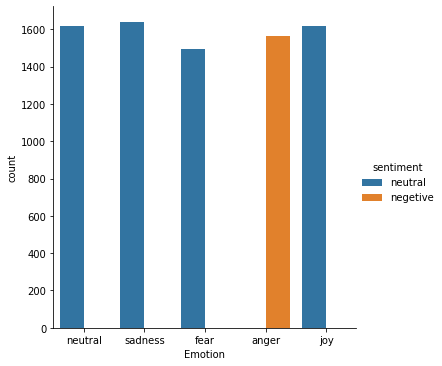

In [20]:
sns.catplot(x='Emotion',hue='sentiment',data=data,kind='count')

- Data cleaning
- remove noise
- remove stop words
- remove punctuation

In [21]:
import neattext.functions as nfx

In [22]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [23]:
data['cleantext']=data['Text'].apply(nfx.remove_stopwords)
data['cleantext']=data['Text'].apply(nfx.remove_punctuations)
data['cleantext']=data['Text'].apply(nfx.remove_special_characters)

In [24]:
data.head(20)

,Emotion,Text,sentiment,cleantext
0,neutral,There are tons of other paintings that I thin...,neutral,There are tons of other paintings that I thin...
1,sadness,"Yet the dog had grown old and less capable , a...",neutral,Yet the dog had grown old and less capable an...
2,fear,When I get into the tube or the train without ...,neutral,When I get into the tube or the train without ...
3,fear,This last may be a source of considerable disq...,neutral,This last may be a source of considerable disq...
4,anger,She disliked the intimacy he showed towards so...,negetive,She disliked the intimacy he showed towards so...
5,sadness,When my family heard that my Mother's cousin w...,neutral,When my family heard that my Mothers cousin wh...
6,joy,Finding out I am chosen to collect norms for C...,neutral,Finding out I am chosen to collect norms for C...
7,anger,A spokesperson said : ` Glen is furious that t...,negetive,A spokesperson said Glen is furious that the...
8,neutral,Yes .,neutral,Yes
9,sadness,"When I see people with burns I feel sad, actua...",neutral,When I see people with burns I feel sad actual...


In [25]:
data[['Text','cleantext']]

,Text,cleantext
0,There are tons of other paintings that I thin...,There are tons of other paintings that I thin...
1,"Yet the dog had grown old and less capable , a...",Yet the dog had grown old and less capable an...
2,When I get into the tube or the train without ...,When I get into the tube or the train without ...
3,This last may be a source of considerable disq...,This last may be a source of considerable disq...
4,She disliked the intimacy he showed towards so...,She disliked the intimacy he showed towards so...
...,...,...
7929,When I felt alone and without love.,When I felt alone and without love
7930,Irina hung up in exasperation .,Irina hung up in exasperation
7931,No wonder she was now inconsolable at the pros...,No wonder she was now inconsolable at the pros...
7932,My friend had been telling me about a certain ...,My friend had been telling me about a certain ...


In [26]:
from collections import Counter
def extraction_key_words(text,num=50):
    tokens=[tok for tok in text.split()]
    most_common_tokens=Counter(tokens).most_common(num)
    return dict(most_common_tokens)

In [27]:
list=data[data['Emotion']=='joy']['cleantext'].tolist()

In [28]:
doc=' '.join(list)

In [29]:
keyword=extraction_key_words(doc)

In [30]:
keyword

{'I': 1421,
 'the': 991,
 'a': 835,
 'to': 660,
 'and': 589,
 'was': 560,
 'of': 481,
 'my': 437,
 'in': 388,
 'that': 346,
 'had': 326,
 'When': 306,
 'for': 301,
 'with': 258,
 'me': 243,
 'you': 243,
 'at': 233,
 'it': 187,
 'very': 183,
 'when': 147,
 'on': 137,
 'not': 127,
 'is': 121,
 'happy': 119,
 'he': 114,
 'from': 109,
 'her': 109,
 'time': 107,
 'good': 107,
 'an': 105,
 'have': 104,
 'we': 103,
 'The': 101,
 'as': 100,
 'got': 98,
 's': 97,
 'this': 93,
 'so': 93,
 'about': 92,
 'been': 91,
 'felt': 89,
 'his': 88,
 'friend': 85,
 'first': 85,
 'she': 84,
 'be': 83,
 'like': 82,
 'were': 81,
 'after': 78,
 'but': 70}

In [31]:
def most_common_words(my_dict):
    df=pd.DataFrame(my_dict.items(),columns=['token','count'])
    plt.figure(figsize=(20,10))
    sns.barplot(x='token',y='count',data=df)
    plt.show()

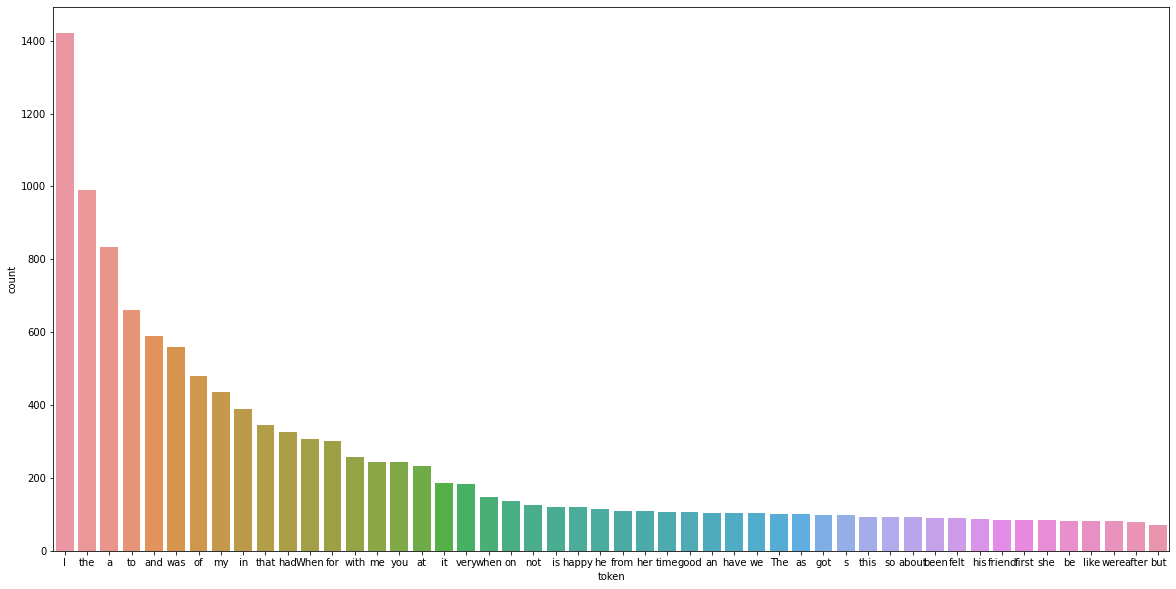

In [32]:
most_common_words(keyword)

In [33]:
!pip install wordcloud

     |████████████████████████████████| 371 kB 15.6 MB/s 


In [34]:
from wordcloud import WordCloud

In [35]:
def word_cloud(doc):
    word_cloud=WordCloud().generate(doc)
    plt.figure(figsize=(20,10))
    plt.axis('off')
    plt.imshow(word_cloud,interpolation='bilinear')
    plt.show()

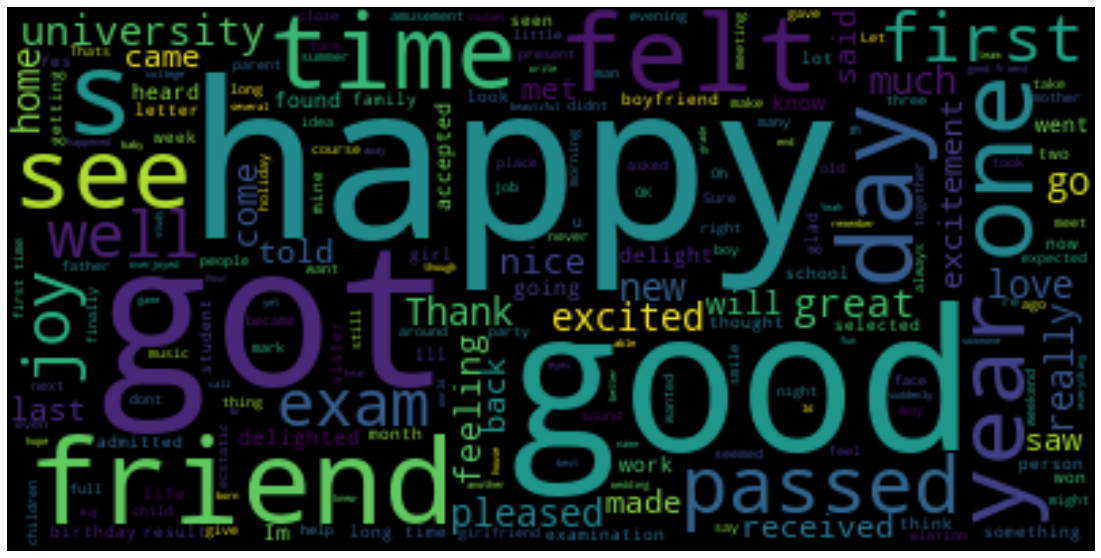

In [36]:
word_cloud(doc)

#Machine Learning
- Naive Bayes
- LogisticRegression
- KNN
- Decession Tree 

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

In [40]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [41]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
x=data['cleantext']
y=data['Emotion']

In [50]:
cv=CountVectorizer()
X=cv.fit_transform(x)

In [45]:
#get features by name 
cv.get_feature_names()

['00',
 '10',
 '100',
 '1000',
 '100000',
 '1011',
 '102',
 '103',
 '1030',
 '10th',
 '10year',
 '11',
 '110',
 '112',
 '12',
 '120',
 '1217',
 '122',
 '1230',
 '12521260',
 '1283',
 '12c',
 '12th',
 '13',
 '135',
 '13th',
 '14',
 '140',
 '1400',
 '1430',
 '14point',
 '15',
 '150',
 '1500',
 '15000',
 '151',
 '1516',
 '15th',
 '16',
 '16th',
 '17',
 '17th',
 '18',
 '1808',
 '1815',
 '187',
 '1878',
 '18th',
 '18years',
 '19',
 '191523',
 '1926',
 '1929',
 '1940s',
 '1975',
 '1976',
 '1977',
 '1978',
 '1980',
 '1982',
 '1983',
 '19831984',
 '1984',
 '1985',
 '1986',
 '1987',
 '1989',
 '1991',
 '1992',
 '199394',
 '1997',
 '1st',
 '1stwhen',
 '20',
 '200',
 '2000',
 '20000',
 '200000',
 '2007',
 '2009the',
 '2011',
 '2012',
 '2035',
 '20s',
 '20th',
 '2130',
 '218000',
 '21st',
 '2230',
 '22nd',
 '23',
 '230',
 '23monthold',
 '23rd',
 '24',
 '24hours',
 '24th',
 '25',
 '250',
 '25th',
 '26',
 '263',
 '28',
 '28th',
 '2march',
 '2nd',
 '2this',
 '30',
 '300',
 '30th',
 '31',
 '310',
 '313

In [51]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [52]:
nv_model=MultinomialNB()
nv_model.fit(x_train,y_train)

MultinomialNB()

In [53]:
nv_model.score(x_test,y_test)

0.6628859483301828

In [54]:
#prediction
y_pred_for_nv=nv_model.predict(x_test)

In [55]:
y_pred_for_nv

array(['sadness', 'anger', 'fear', ..., 'joy', 'neutral', 'sadness'],
      dtype='<U7')

In [56]:
nv_model.predict_proba(x_test[0])

array([[3.69856271e-03, 3.69841063e-03, 1.01319114e-02, 4.41909265e-06,
        9.82466696e-01]])

In [59]:
nv_model.classes_

array(['anger', 'fear', 'joy', 'neutral', 'sadness'], dtype='<U7')

In [60]:
np.max(nv_model.predict_proba(x_test[0]))

0.9824666961262346

In [65]:
def predict_emotions(text,model):
    myvect=cv.transform(text).toarray()
    prediction=model.predict(myvect)
    pred_prob=model.predict_proba(myvect)
    ped_precentage_for_all=dict(zip(model.classes_,pred_prob[0]))
    print("prediction{},prediction score{}".format(prediction[0],np.max(pred_prob)))
    return ped_precentage_for_all

In [66]:
predict_emotions(["thats not at all good"],nv_model)

predictionjoy,prediction score0.5231341892984184


{'anger': 0.19982559272748646,
 'fear': 0.02287676662923844,
 'joy': 0.5231341892984184,
 'neutral': 0.07519875511029198,
 'sadness': 0.17896469623456476}

In [69]:
print(classification_report(y_test,y_pred_for_nv)

              precision    recall  f1-score   support

       anger       0.65      0.69      0.67       331
        fear       0.68      0.66      0.67       278
         joy       0.67      0.65      0.66       334
     neutral       0.69      0.59      0.64       332
     sadness       0.63      0.72      0.67       312

    accuracy                           0.66      1587
   macro avg       0.66      0.66      0.66      1587
weighted avg       0.66      0.66      0.66      1587



In [71]:
print(confusion_matrix(y_test,y_pred_for_nv))

[[229  30  25  17  30]
 [ 25 183  15  15  40]
 [ 27  18 218  41  30]
 [ 38  22  43 197  32]
 [ 32  18  22  15 225]]


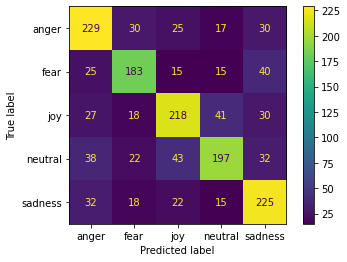

In [73]:
plot_confusion_matrix(nv_model,x_test,y_test)

#Save_Model

In [75]:
import joblib

model_file=open('emotion_classifier_1.pkl','wb')
joblib.dump(nv_model,model_file)
model_file.close

INTERPRETING THE MODEL
  
- ELI5
- LIME
- SHAP

In [82]:
#LOGISTICREGRESSION
lr_model=LogisticRegression(solver='liblinear')
lr_model.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [83]:
lr_model.score(x_test,y_test)

0.7051039697542533

In [84]:
predict_emotions(["thats not at all good"],lr_model)

predictionjoy,prediction score0.41834100985729294


{'anger': 0.11864514320939913,
 'fear': 0.019996183741464845,
 'joy': 0.41834100985729294,
 'neutral': 0.17565757401815424,
 'sadness': 0.2673600891736888}

In [85]:
!pip install eli5

     |████████████████████████████████| 106 kB 17.8 MB/s 


In [87]:
import eli5
eli5.show_weights(lr_model,top=20)

y=anger
 
 

top features
 
 
 
 
 
 y=fear
 
 

top features
 
 
 
 
 
 y=joy
 
 

top features
 
 
 
 
 
 y=neutral
 
 

top features
 
 
 
 
 
 y=sadness
 
 

top features
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 Weight ? 
 
 
 Feature 
 
 
 
 
 
 
 
 +3.448
 
 
 x509
 
 
 
 
 
 
 +3.369
 
 
 x3296
 
 
 
 
 
 
 +3.339
 
 
 x513
 
 
 
 
 
 
 +3.286
 
 
 x3872
 
 
 
 
 
 
 +3.134
 
 
 x528
 
 
 
 
 
 
 +2.998
 
 
 x7773
 
 
 
 
 
 
 +2.859
 
 
 x6497
 
 
 
 
 
 
 +2.472
 
 
 x4806
 
 
 
 
 
 
 +2.466
 
 
 x6851
 
 
 
 
 
 
 +2.420
 
 
 x4771
 
 
 
 
 
 
 +2.366
 
 
 x5956
 
 
 
 
 
 
 +2.365
 
 
 x5663
 
 
 
 
 
 
 +2.252
 
 
 x5532
 
 
 
 
 
 
 +2.188
 
 
 x2288
 
 
 
 
 
 
 +2.134
 
 
 x4868
 
 
 
 
 
 
 +1.988
 
 
 x3295
 
 
 
 
 
 
 +1.930
 
 
 x3265
 
 
 
 
 
 
 
 … 2894 more positive … 
 
 
 

 
 
 
 … 6514 more negative … 
 
 
 
 
 
 
 -1.889
 
 
 x8106
 
 
 
 
 
 
 -2.137
 
 
 x342
 
 
 
 
 
 
 -2.390
 
 
 <BIAS>
 
 
 
 

 
 

 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 Weight ? 
 
 
 Feature 
 
 
 
 
 
 
 
 +3.626
 
 
 x4545
 
 
 
 
 
 
 +3.587
 
 
 x8106
 
 
 
 
 
 
 +3.508
 
 
 x3822
 
 
 
 
 
 
 +3.503
 
 
 x1992
 
 
 
 
 
 
 +3.415
 
 
 x3498
 
 
 
 
 
 
 +3.308
 
 
 x367
 
 
 
 
 
 
 +3.262
 
 
 x6296
 
 
 
 
 
 
 +3.246
 
 
 x2750
 
 
 
 
 
 
 +3.196
 
 
 x4544
 
 
 
 
 
 
 +2.793
 
 
 x2763
 
 
 
 
 
 
 +2.769
 
 
 x552
 
 
 
 
 
 
 +2.413
 
 
 x410
 
 
 
 
 
 
 +2.402
 
 
 x342
 
 
 
 
 
 
 +2.279
 
 
 x3499
 
 
 
 
 
 
 +2.009
 
 
 x3425
 
 
 
 
 
 
 
 … 3355 more positive … 
 
 
 

 
 
 
 … 6053 more negative … 
 
 
 
 
 
 
 -1.756
 
 
 x2652
 
 
 
 
 
 
 -1.785
 
 
 x8691
 
 
 
 
 
 
 -2.084
 
 
 x4300
 
 
 
 
 
 
 -2.182
 
 
 x8029
 
 
 
 
 
 
 -2.441
 
 
 <BIAS>
 
 
 
 

 
 

 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 Weight ? 
 
 
 Feature 
 
 
 
 
 
 
 
 +3.932
 
 
 x4300
 
 
 
 
 
 
 +3.852
 
 
 x2520
 
 
 
 
 
 
 +3.543
 
 
 x7017
 
 
 
 
 
 
 +3.451
 
 
 x3311
 
 
 
 
 
 
 +3.442
 
 
 x3309
 
 
 
 
 
 
 +3.184
 
 
 x2519
 
 
 
 
 
 
 +2.990
 
 
 x5135
 
 
 
 
 
 
 +2.981
 
 
 x3077
 
 
 
 
 
 
 +2.806
 
 
 x492
 
 
 
 
 
 
 +2.488
 
 
 x6328
 
 
 
 
 
 
 +2.290
 
 
 x3993
 
 
 
 
 
 
 +2.228
 
 
 x6667
 
 
 
 
 
 
 +2.155
 
 
 x301
 
 
 
 
 
 
 +2.122
 
 
 x3032
 
 
 
 
 
 
 +2.118
 
 
 x491
 
 
 
 
 
 
 
 … 2591 more positive … 
 
 
 

 
 
 
 … 6817 more negative … 
 
 
 
 
 
 
 -2.021
 
 
 <BIAS>
 
 
 
 
 
 
 -2.062
 
 
 x2652
 
 
 
 
 
 
 -2.069
 
 
 x513
 
 
 
 
 
 
 -2.352
 
 
 x8691
 
 
 
 
 
 
 -2.510
 
 
 x8029
 
 
 
 

 
 

 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 Weight ? 
 
 
 Feature 
 
 
 
 
 
 
 
 +1.815
 
 
 x2189
 
 
 
 
 
 
 +1.425
 
 
 x10315
 
 
 
 
 
 
 +1.416
 
 
 x9925
 
 
 
 
 
 
 +1.379
 
 
 x3321
 
 
 
 
 
 
 +1.362
 
 
 x6743
 
 
 
 
 
 
 
 … 1054 more positive … 
 
 
 

 
 
 
 … 8354 more negative … 
 
 
 
 
 
 
 -1.366
 
 
 x6218
 
 
 
 
 
 
 -1.377
 
 
 x953
 
 
 
 
 
 
 -1.412
 
 
 x2828
 
 
 
 
 
 
 -1.427
 
 
 x811
 
 
 
 
 
 
 -1.433
 
 
 x6982
 
 
 
 
 
 
 -1.451
 
 
 x8029
 
 
 
 
 
 
 -1.459
 
 
 x2520
 
 
 
 
 
 
 -1.467
 
 
 x3498
 
 
 
 
 
 
 -1.485
 
 
 x3526
 
 
 
 
 
 
 -1.499
 
 
 x8691
 
 
 
 
 
 
 -1.499
 
 
 x2449
 
 
 
 
 
 
 -1.525
 
 
 x999
 
 
 
 
 
 
 -1.537
 
 
 x8705
 
 
 
 
 
 
 -1.569
 
 
 x4324
 
 
 
 
 
 
 -1.749
 
 
 x2652
 
 
 
 

 
 

 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 Weight ? 
 
 
 Feature 
 
 
 
 
 
 
 
 +4.084
 
 
 x8029
 
 
 
 
 
 
 +3.579
 
 
 x8691
 
 
 
 
 
 
 +3.559
 
 
 x2652
 
 
 
 
 
 
 +3.446
 
 
 x2558
 
 
 
 
 
 
 +3.372
 
 
 x6007
 
 
 
 
 
 
 +3.082
 
 
 x4145
 
 
 
 
 
 
 +2.902
 
 
 x514
 
 
 
 
 
 
 +2.664
 
 
 x4372
 
 
 
 
 
 
 +2.612
 
 
 x4021
 
 
 
 
 
 
 +2.389
 
 
 x2449
 
 
 
 
 
 
 +2.297
 
 
 x2605
 
 
 
 
 
 
 +2.265
 
 
 x6982
 
 
 
 
 
 
 +2.249
 
 
 x8034
 
 
 
 
 
 
 +2.220
 
 
 x3433
 
 
 
 
 
 
 +2.209
 
 
 x4742
 
 
 
 
 
 
 +2.042
 
 
 x2714
 
 
 
 
 
 
 +2.013
 
 
 x5632
 
 
 
 
 
 
 
 … 2440 more positive … 
 
 
 

 
 
 
 … 6968 more negative … 
 
 
 
 
 
 
 -2.019
 
 
 <BIAS>
 
 
 
 
 
 
 -2.070
 
 
 x509
 
 
 
 
 
 
 -2.102
 
 
 x513

just to know which are the top features
we have to get the feature name 

In [90]:
class_names=y_train.unique()

In [92]:
feature_names=cv.get_feature_names()

In [93]:
eli5.show_weights(lr_model,top=20,feature_names=feature_names,target_names=class_names)

y=fear
 
 

top features
 
 
 
 
 
 y=joy
 
 

top features
 
 
 
 
 
 y=neutral
 
 

top features
 
 
 
 
 
 y=sadness
 
 

top features
 
 
 
 
 
 y=anger
 
 

top features
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 Weight ? 
 
 
 Feature 
 
 
 
 
 
 
 
 +3.448
 
 
 anger
 
 
 
 
 
 
 +3.369
 
 
 exasperation
 
 
 
 
 
 
 +3.339
 
 
 angry
 
 
 
 
 
 
 +3.286
 
 
 furious
 
 
 
 
 
 
 +3.134
 
 
 annoyance
 
 
 
 
 
 
 +2.998
 
 
 resentful
 
 
 
 
 
 
 +2.859
 
 
 offended
 
 
 
 
 
 
 +2.472
 
 
 infuriated
 
 
 
 
 
 
 +2.466
 
 
 peeved
 
 
 
 
 
 
 +2.420
 
 
 indignant
 
 
 
 
 
 
 +2.366
 
 
 miffed
 
 
 
 
 
 
 +2.365
 
 
 mad
 
 
 
 
 
 
 +2.252
 
 
 livid
 
 
 
 
 
 
 +2.188
 
 
 cross
 
 
 
 
 
 
 +2.134
 
 
 insulted
 
 
 
 
 
 
 +1.988
 
 
 exasperated
 
 
 
 
 
 
 +1.930
 
 
 everybody
 
 
 
 
 
 
 
 … 2894 more positive … 
 
 
 

 
 
 
 … 6514 more negative … 
 
 
 
 
 
 
 -1.889
 
 
 scared
 
 
 
 
 
 
 -2.137
 
 
 afraid
 
 
 
 
 
 
 -2.390
 
 
 <BIAS>
 
 
 
 

 
 

 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 Weight ? 
 
 
 Feature 
 
 
 
 
 
 
 
 +3.626
 
 
 horror
 
 
 
 
 
 
 +3.587
 
 
 scared
 
 
 
 
 
 
 +3.508
 
 
 frightened
 
 
 
 
 
 
 +3.503
 
 
 concerned
 
 
 
 
 
 
 +3.415
 
 
 fear
 
 
 
 
 
 
 +3.308
 
 
 agitated
 
 
 
 
 
 
 +3.262
 
 
 nervous
 
 
 
 
 
 
 +3.246
 
 
 dismay
 
 
 
 
 
 
 +3.196
 
 
 horrified
 
 
 
 
 
 
 +2.793
 
 
 disquiet
 
 
 
 
 
 
 +2.769
 
 
 anxious
 
 
 
 
 
 
 +2.413
 
 
 alarmed
 
 
 
 
 
 
 +2.402
 
 
 afraid
 
 
 
 
 
 
 +2.279
 
 
 feared
 
 
 
 
 
 
 +2.009
 
 
 factor
 
 
 
 
 
 
 
 … 3355 more positive … 
 
 
 

 
 
 
 … 6053 more negative … 
 
 
 
 
 
 
 -1.756
 
 
 died
 
 
 
 
 
 
 -1.785
 
 
 sorry
 
 
 
 
 
 
 -2.084
 
 
 happy
 
 
 
 
 
 
 -2.182
 
 
 sad
 
 
 
 
 
 
 -2.441
 
 
 <BIAS>
 
 
 
 

 
 

 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 Weight ? 
 
 
 Feature 
 
 
 
 
 
 
 
 +3.932
 
 
 happy
 
 
 
 
 
 
 +3.852
 
 
 delighted
 
 
 
 
 
 
 +3.543
 
 
 pleased
 
 
 
 
 
 
 +3.451
 
 
 excitement
 
 
 
 
 
 
 +3.442
 
 
 excited
 
 
 
 
 
 
 +3.184
 
 
 delight
 
 
 
 
 
 
 +2.990
 
 
 joy
 
 
 
 
 
 
 +2.981
 
 
 elation
 
 
 
 
 
 
 +2.806
 
 
 amusement
 
 
 
 
 
 
 +2.488
 
 
 nice
 
 
 
 
 
 
 +2.290
 
 
 glad
 
 
 
 
 
 
 +2.228
 
 
 overjoyed
 
 
 
 
 
 
 +2.155
 
 
 admitted
 
 
 
 
 
 
 +2.122
 
 
 ecstatic
 
 
 
 
 
 
 +2.118
 
 
 amused
 
 
 
 
 
 
 
 … 2591 more positive … 
 
 
 

 
 
 
 … 6817 more negative … 
 
 
 
 
 
 
 -2.021
 
 
 <BIAS>
 
 
 
 
 
 
 -2.062
 
 
 died
 
 
 
 
 
 
 -2.069
 
 
 angry
 
 
 
 
 
 
 -2.352
 
 
 sorry
 
 
 
 
 
 
 -2.510
 
 
 sad
 
 
 
 

 
 

 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 Weight ? 
 
 
 Feature 
 
 
 
 
 
 
 
 +1.815
 
 
 country
 
 
 
 
 
 
 +1.425
 
 
 whats
 
 
 
 
 
 
 +1.416
 
 
 universe
 
 
 
 
 
 
 +1.379
 
 
 excuse
 
 
 
 
 
 
 +1.362
 
 
 paper
 
 
 
 
 
 
 
 … 1054 more positive … 
 
 
 

 
 
 
 … 8354 more negative … 
 
 
 
 
 
 
 -1.366
 
 
 myself
 
 
 
 
 
 
 -1.377
 
 
 beautiful
 
 
 
 
 
 
 -1.412
 
 
 doing
 
 
 
 
 
 
 -1.427
 
 
 away
 
 
 
 
 
 
 -1.433
 
 
 pity
 
 
 
 
 
 
 -1.451
 
 
 sad
 
 
 
 
 
 
 -1.459
 
 
 delighted
 
 
 
 
 
 
 -1.467
 
 
 fear
 
 
 
 
 
 
 -1.485
 
 
 felt
 
 
 
 
 
 
 -1.499
 
 
 sorry
 
 
 
 
 
 
 -1.499
 
 
 death
 
 
 
 
 
 
 -1.525
 
 
 being
 
 
 
 
 
 
 -1.537
 
 
 sounds
 
 
 
 
 
 
 -1.569
 
 
 hate
 
 
 
 
 
 
 -1.749
 
 
 died
 
 
 
 

 
 

 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 Weight ? 
 
 
 Feature 
 
 
 
 
 
 
 
 +4.084
 
 
 sad
 
 
 
 
 
 
 +3.579
 
 
 sorry
 
 
 
 
 
 
 +3.559
 
 
 died
 
 
 
 
 
 
 +3.446
 
 
 depressed
 
 
 
 
 
 
 +3.372
 
 
 miserable
 
 
 
 
 
 
 +3.082
 
 
 grief
 
 
 
 
 
 
 +2.902
 
 
 anguish
 
 
 
 
 
 
 +2.664
 
 
 heartbroken
 
 
 
 
 
 
 +2.612
 
 
 glum
 
 
 
 
 
 
 +2.389
 
 
 death
 
 
 
 
 
 
 +2.297
 
 
 despondent
 
 
 
 
 
 
 +2.265
 
 
 pity
 
 
 
 
 
 
 +2.249
 
 
 sadness
 
 
 
 
 
 
 +2.220
 
 
 failed
 
 
 
 
 
 
 +2.209
 
 
 inconsolable
 
 
 
 
 
 
 +2.042
 
 
 disconsolate
 
 
 
 
 
 
 +2.013
 
 
 lugubrious
 
 
 
 
 
 
 
 … 244